## Logistic ClassAdding noise (features with no information) degrades model skill
Quick experiment to show that while adding extra random features does improve model fit on the training dataset it will degrade the test set skill. Here skill is evaluated by the auc roc score

In [1]:
# Import 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Make toy dataset
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42) #100 samples

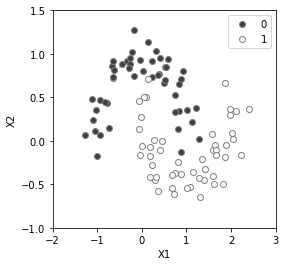

In [2]:
# Quick look at the data
plt.figure(figsize=(4, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "o", label="0", markeredgecolor=[.5,.5,.5],color=[0.25, 0.25, 0.25])
plt.plot(X[y==1, 0], X[y==1, 1], "wo", label="1", markeredgecolor=[.5,.5,.5])
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim([-2,3])
plt.ylim([-1,1.5])
plt.show()

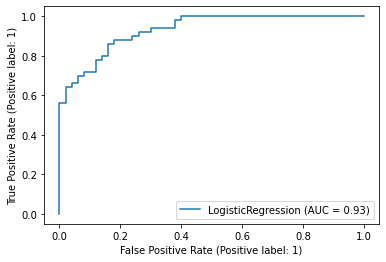

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

vC = 0.1
log_clf = LogisticRegression(C=vC)
log_clf.fit(X,y)

metrics.plot_roc_curve(log_clf,X,y)

### Adding uninformative features
Improves training set AUC

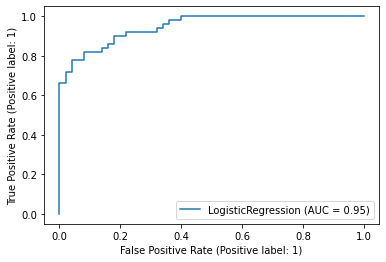

In [8]:
Xe = np.concatenate((X,np.random.randn(100,5)),axis=1)
log_clf.fit(Xe,y)
metrics.plot_roc_curve(log_clf,Xe,y)

### What about on the test set?
Performance degrades

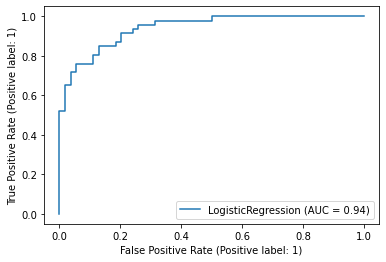

In [11]:
from sklearn.model_selection import train_test_split
X, y = datasets.make_moons(n_samples=200, noise=0.15, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
log_clf.fit(X_train,y_train)
metrics.plot_roc_curve(log_clf, X_test, y_test)

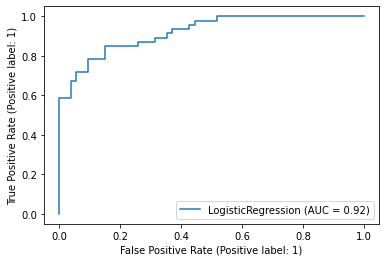

In [14]:
Xe = np.concatenate((X,np.random.randn(200,10)),axis=1)
X_train, X_test, y_train, y_test = train_test_split(Xe, y, test_size=0.5, random_state=42)
log_clf.fit(X_train,y_train)
metrics.plot_roc_curve(log_clf, X_test, y_test)